# **Introduction**

***Neuron Anatomy.*** Neurons are specialized cells of the nervous system which transmit electrical signals throughout the body in the form of action potentials (APs). The cell body, also called the soma, contains the nucleus and is responsible for integrating synaptic signals. Extending from the soma are many projections. Those of which receive incoming signals are called dendrites. Projections which transfer signals to other cells are called axons. 

Neuronal membranes are composed of phosphates and lipids, earning the name 'phospholipid bilayer'. Hydrophilic phosphates line the inner and outer membrane while hydrophobic lipids fill the space between the phosphates. Since the inside of the membrane repels water, molecules cannot diffuse passively through the membrane and must travel through channels. The amount of molecules traveling through the membrane per unit time is called the current ($I(t)$). Any non-zero current will cause a change in the distribution of charges between the intracellular and extracellular spaces. The difference in charge across the membrane is called the membrane potential ($V(t)$). 

***Action Potential Generation.*** Two ions essential to AP generation in neurons are sodium ($Na^{+}$) and potassium ($K^{+}$). The resting potential of a membrane depends on the relative distribution of these ions. Should a membrane be solely permeable to $K^{+}$, $K^{+}$ ions move out of the cell through potassium channels, causing a buildup of positive charge on the outside of the membrane and negative charge on the inside of the membrane. The Nernst Equation uses these ionic concentrations to define the ion’s equilibrium potential. Since positive $K^{+}$ ions move out the cell, potassium’s equilibrium potential is negative, falling around $-75$ mV. At this voltage, no net $K^{+}$ current would flow. The same assessment can be made for $Na^{+}$. For a membrane solely permeable to sodium, $Na^{+}$ ions flow into the cell, so positive charge builds inside the membrane. The equilibrium potential of $Na^{+}$ is therefore positive, around $55$ mV. In reality, neuronal membranes are permeable to a variety of ions. The membrane potential in this case reflects the balance between the ions’ conductances. 

The course of an action potential includes a depolarization, a re-polarization, and a hyper-polarization. At rest, although overall conductance is low, potassium conductance is higher than sodium conductance. The resting membrane potential is therefore weighted towards the $K^{+}$ equilibrium potential, falling typically around -60 mV. The depolarization stage results from the opening of voltage-gated $Na^{+}$ channels, which allows a large influx of positive sodium ions. The rapid spike of $Na^{+}$ current occurs once the membrane reaches a critical voltage which opens a sufficient amount of $Na^{+}$ channels, called the AP voltage threshold ($V_{thres}$). The opening of $Na^{+}$ channels increases the conductance to $Na^{+}$, and brings the membrane potential up to the $Na^{+}$ equilibrium potential, $55$ mV. The re-polarization stage is the result of both the inactivation of voltage-gated $Na^{+}$ channels and the opening of $K^{+}$ channels, which collectively allow a large efflux of positive potassium ions without an opposing inward $Na^{+}$ current. The membrane potential therefore dips back towards the $K^{+}$ equilibrium potential, $-75$ mV. This period of $Na^{+}$ channel deactivation is known as the absolute refractory period. A consecutive AP can not be generated during this period due to the inactive $Na^{+}$ channels. Once the membrane is re-polarized to the resting potential, $K^{+}$ channels remain open while $Na^{+}$ channels are partially inactive, causing the membrane potential to drop below the resting potential and further approach the equilibrium potential for potassium. This stage is called the after-hyperpolarization. This period when $Na^{+}$ channels are in recovery also defines the neuron’s relative refractory period. A new AP can be generated during this period if the current intensity is high enough to effectively open enough active $Na^{+}$ channels and depolarize the membrane to $V_{thres}$. 

***Neurons as Physical Systems.*** Current and voltage are both properties of phyiscal systems, so the phospholipid bilayer can be described as an electrical circuit. A capacitor is a system of two conducting surfaces separated by an insultating material. The bilayer is therefore a capacitor as charges are separated between the intracellular fluid and extracellular space. The membrane capacitance ($C$) defines how much charge accumulates on each side of the membrane. This quantity depends on the surface area of the membrane, as a larger membrane can accumlate more charges. The conductance ($g$) of a membrane describes the ease with which ions flow across it, which is therefore related to the quantity and state of ion channels. 

Neurons typically rest at a potential of about $-60$ mV. Since this value is above the equilibrium potential for $K^{+}$, there is a steady leak current of $K^{+}$ out of the cell. Similarly for $Na^{+}$, the resting potential is below its equilibrium potential, so there is a steady leak current of $Na^{+}$ into the cell. The conductance of the membrane to these leak currents is the leak conductance ($g_L$). The membrane voltage at which those leaky currents have zero net movement is the leak equilibrium potential ($E_L$), which defines the resting potential of the neuron.  

Each ion channel can be thought of as a RC circuit, where the channel state defines the resistance and charge accumulation across the membrane defines the capacitance. In reality, neuronal membranes have a variety of dynamic conductances, however the LIF model reduces membrane dynamics to having a single, constant leak conductance. This passive cell membrane RC circuit is described by the equation:

$I = C \frac{dV}{dt} + g_L \left( V - E_L \right)$. 

This equation can be re-arranged to yield the time constant ($\tau$) of AP generation: 

$\tau \frac{dV}{dt} = - \left( V - E_L \right) + \frac{I}{g_L}$. 

It can also be re-arranged to describe the voltage change ($dV$) for a single time step ($dt$):

$dV = \left( - \left( V - E_L \right) + \frac{I}{g_L} \right) \frac{dt}{\tau}$

***LIF Model.*** The Leaky Integrate-and-Fire (LIF) model is a mathematical simulation of action potential generation in a single neuron. As shown in the first equation above, the leak current is defined by the leak membrane conductance ($g_L$) and the difference between the membrane voltage and leak equilibrium potential ($V - E_L$). The only non-constant membrane property in the LIF model is the membrane potential. The membrane voltage change at any time ($dV/{dt}$) can be calculated by integrating the change in voltage ($dV$) over time. The voltage at subsequent time stamps is therefore defined as the voltage at the previous time step plus the change in voltage during time t:

$V(t+dt) = V(t) + dV(t)$

The neuron fires an AP if the membrane voltage ($V$) exceeds the voltage threshold ($V_{thres}$). After AP generation, the membrane potential hyper-polarizes to a refractory potential ($V_{refract}$) which defines its absolute refractory period. It remains hyperpolarized for a period of time defined by the refractory time constant ($\tau_{refract}$), then resets to $E_L$:

If $V(t) = V_{thres}$, then $V(t+dt) = E_L$. 

The LIF simulation encompasses these properties to descibe how neurons in vivo respond to synaptic inputs. This model is linear below the AP voltage threshold, then nonlinear as spiking and reseting occurs. The goal of this project is to evalute the accuracy of a basic LIF model by comparing it to real neuron electrophysiology data. 

---
# **Methods**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## ***LIF Model Implementation***
- $I$: an array of values representing the intensity of the current injection over time in picoAmperes (pA) 
- $dt$: amount of time between samples in milliseconds (ms) 
- $E_L$: leak reversal potential which defines the resting potential in milliVolts (mV)
- $g_L$: leak membrane conductance in nanoSiemens (nS)
- $\tau$: membrane time constant (ms)
- $V_{thres}$: AP voltage threshold (mV)
- $V_{refract}$: refractory reset potential (mV)
- $\tau_{refract}$: refractory period time interval (ms)
- $maxDepol$: the depolarized value the cell reaches during a spike (mV)

$I$ and $dt$ must be defined by the user before simulation. The rest of the values can be manually defined or left as the default parameters which describe a typical neuron. 

In [2]:
def LIF(I, dt, EL = -65, gL = 10, tau = 10, VThresh = -55, VRefract = -75, tauRefract = 2, maxDepol = 0):

    spikeTimes = [] # list of the times at which an AP was intiated 
    refractTime = 0 # to determine whether or not the neuron is in a refractory period 
    V = np.zeros(I.shape) # voltage array to store the membrane voltage at each time step 
    V[0] = EL # seting the membrane voltage at the first time step to the resting potential 

    for i in range(1, len(V)): # iterate through the time steps, not including the first step which has already been initialized 

        if refractTime > 0: # if the neuron is in the refractory period...
            V[i] = VRefract # then the membrane voltage is at the refractory reset potential 
            refractTime -= dt # decrease refractory time by the time step 
            continue # move to the next time stamp 

        # if the neuron is not in the refractory period...
        dV = ( -(V[i-1] - EL) + I[i-1] / gL ) * (dt / tau) # calculate the change in voltage for the ith time step 
        V[i] = V[i-1] + dV # voltage at ith time step is the voltage at the (i-1) time step + dV

        if V[i] >= VThresh: # if the membrane is depolarized to the AP voltage threshold... 
            spikeTime = i * dt # the neuron spikes at time i*dt 
            spikeTimes.append(spikeTime) 
            V[i] = maxDepol # to indicate a spike 
            refractTime = tauRefract # neuron is now in the refractory period 
            
    return V, spikeTimes # output = voltage time series and spike times 

## ***Loading Real Neuron Data***

In [3]:
from allensdk.core.cell_types_cache import CellTypesCache 
ctc = CellTypesCache(manifest_file='cell_types/manifest.json') # initiate CellTypesCache instance

# save NWB dataset 
cell_specimen_id = 464212183
data_set = ctc.get_ephys_data(cell_specimen_id)

In [4]:
# determining sweep indices 
sweepIdxs = []
for i in range(0,200):
    try: 
        sweep_data = data_set.get_sweep(i)
        sweepIdxs.append(i)
    except:
        continue 

## ***Current and Spike Plots Implementation***

In [5]:
# function to plot current waveform and voltage response of LIF neuron
def LIFPlot(t, I, V):
    plt.style.use('ggplot')
    fig, axes = plt.subplots(2, 1, sharex=True)
    axes[0].plot(time, V, color = 'darkblue')
    axes[0].set_ylabel('Voltage (mV)')
    axes[1].plot(time, I, color = 'cornflowerblue')
    axes[1].set_ylabel('Current (pA)')
    axes[1].set_xlabel('Time (ms)')

In [6]:
# function to plot current waveform and voltage response of real neuron 
def NeuronPlot(sweepIdx):
    sweep_data = data_set.get_sweep(sweepIdx)
    index_range = sweep_data["index_range"]
    i = sweep_data["stimulus"][0:index_range[1]+1] # in A
    v = sweep_data["response"][0:index_range[1]+1] # in V
    i *= 1e12 # to pA
    v *= 1e3 # to mV
    sampling_rate = sweep_data["sampling_rate"] # in Hz
    t = np.arange(0, len(v)) * (1.0 / sampling_rate)
        
    plt.style.use('ggplot')
    fig, axes = plt.subplots(2, 1, sharex=True)
    axes[0].plot(t, v, color='purple')
    axes[1].plot(t, i, color='orchid')
    axes[0].set_ylabel("Voltage (mV)")
    axes[1].set_ylabel("Current (pA)")
    axes[1].set_xlabel("Time (s)")
    plt.show();

## ***Parameter Tuning***

The parameters of the LIF model are defaulted to typical values we might expect to see in a real neuron. Those parameters can also be tuned to fit the characteristics of a known neuron. This process optimizes the LIF simulation for predicting a real neuron's response to other waveforms. That optimization is performed here by observing the properties of one of the real neuron's voltage responses and adjusting the LIF parameters accordingly. 

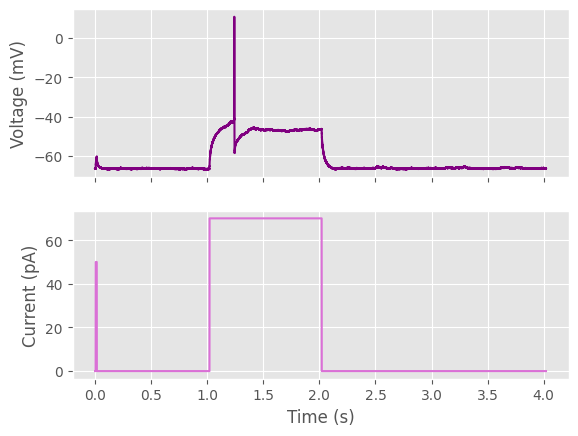

In [7]:
NeuronPlot(45)

**Figure 1.** The real neuron's voltage response to a 1 second step pulse of 70 pA. 

This step pulse is useful for tuning the LIF model because there was a spike generated. The following properties can be inferred from the spike: 

- Resting potential: -65 mV
- AP voltage threshold: -40 mV
- Refractory period voltage: -55 mV
- Maximum depolarization: 20 mV

These parameters are inputed into LIF model to yield the following voltage response to an equivalent current injection. 

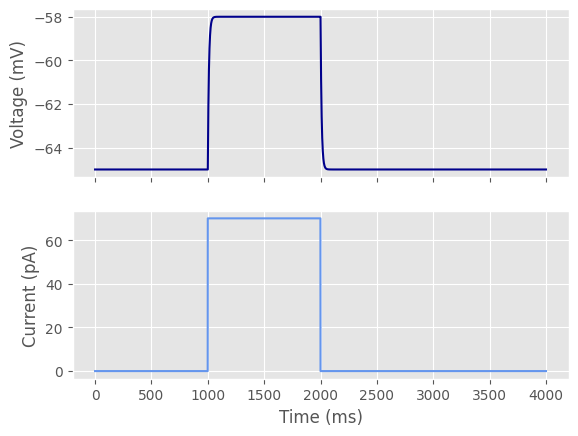

In [8]:
dt = 1 # time between samples (ms)
time = np.arange(0, 4000+dt, dt) # sampling for 4 s every 1 ms
numSamples = time.shape[0] # calculate the number of samples 
I = np.zeros(numSamples) # array to store current time series 
I[1000:2000] = 70 # inject 70 pA for 1 second at 1 second 

# first parameter tuning step with observable membrane properties 
V, spikeTimes = LIF(I, dt, EL = -65, VThresh = -40, VRefract = -55, maxDepol = 20) 
LIFPlot(time, I, V)

**Figure 2.** The partially tuned LIF neuron's response to a 1 second step pulse of 70 pA. 

The LIF neuron failed to initiate an AP in response to this step pulse, so the next step is to sensitive the neuron by adjusting the rest of the parameters. The parameters left to adjust are the leak conductance, time constant, and refractory time constant. 

- The lower the leak conductance, the less current which opposes depolarization, so the more sensitive the cell to voltage change. This value will therefore be reduced from the current value of 10 nS.
- The membrane time constant defines how quickly the cell can repolarize after a voltage change. This value will be adjusted from the current value of 10 ms to resemble the time course of a spike in the real neuron. 
- The refractory period time interval defines how long the neuron remains in the refractory period after a spike. This value will be left alone for now, as only one spike was generated in the real neuron. 

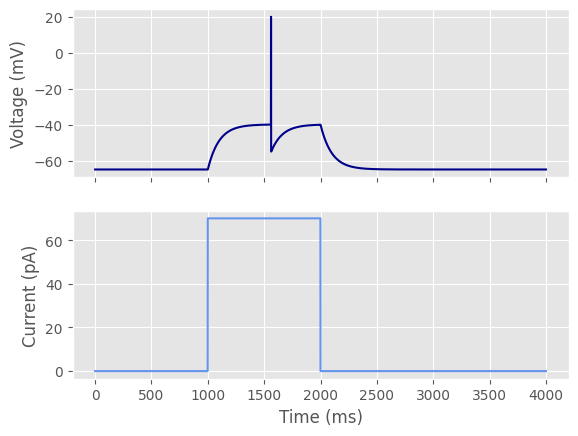

In [9]:
dt = 1 # time between samples (ms)
time = np.arange(0, 4000+dt, dt) # sampling for 4 s every 1 ms
numSamples = time.shape[0] # calculate the number of samples 
I = np.zeros(numSamples) # array to store current time series 
I[1000:2000] = 70 # inject 70 pA for 1 second at 1 second 

# final parameter tuning 
V, spikeTimes = LIF(I, dt, EL = -65, VThresh = -40, VRefract = -55, maxDepol = 20, gL = 2.79, tau = 100) 
LIFPlot(time, I, V)

**Figure 3.** The fully tuned LIF neuron's response to a 1 second step pulse of 70 pA. 

These parameter values were selected based on qualitative comparison between the real neuron spike and LIF neuron response. The following values yield a single spike in the LIF neuron which most closely resembles the real neuron's spike:

- Leak conductance: 2.79 nS
- Time constant: 100 ms
- Refractory time constant: 2 ms (default)

Now that all of the LIF model's parameters have been optimized to simulate our real neuron, the performance of the model can be evaluated by comparing the voltage responses to different current waveforms. 

___
# **Results**

The goal of this project is to assess the accuracy of the LIF model by comparing the simulated voltage responses to real neuron spiking patterns. The real neuron data used here is from the Allen Institute Cell Types database. It contains datasets on neuron electrophysiology and morphology. The electrophysiology data will be used here to examine real whole cell current clamp recordings. This dataset contains voltage responses to a variety of stimulus types. Those stimulus types will be reconstructed and injected into the LIF neuron to compare simulated and natural neuron responses. 

## ***Depolarizing Step Pulses***
The first waveforms reconstructed are depolarizing step pulses of various durations and amplitudes. 

### ***1 Second Step Pulse of 90 pA***
This current waveform is a 1 second duration step pulse of 90 pA. The voltage responses of the LIF neuron and real neuron to this waveform are shown in Figures 4 and 5, respectively. 

[1149, 1263, 1377, 1491, 1605, 1719, 1833, 1947]

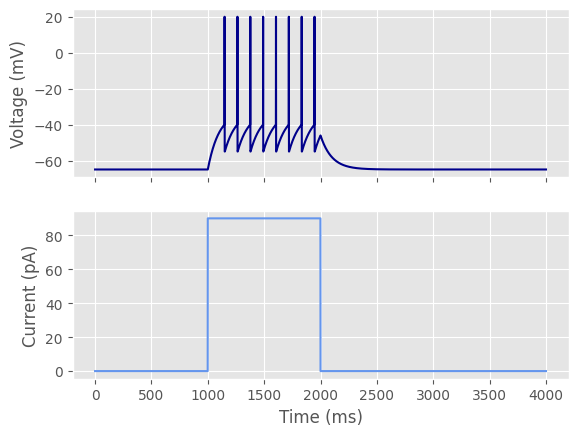

In [10]:
dt = 1 # time between samples (ms)
time = np.arange(0, 4000+dt, dt) # sampling for 4 s every 1 ms
numSamples = time.shape[0] # calculate the number of samples 
I = np.zeros(numSamples) # array to store current time series 
I[1000:2000] = 90 # inject 90 pA for 1 second at 1 second 

V, spikeTimes = LIF(I, dt, EL = -65, VThresh = -40, VRefract = -55, maxDepol = 20, gL = 2.79, tau = 100) 
LIFPlot(time, I, V)
spikeTimes

**Figure 4.** The LIF neuron's response to a 1 second step pulse of 90 pA. 

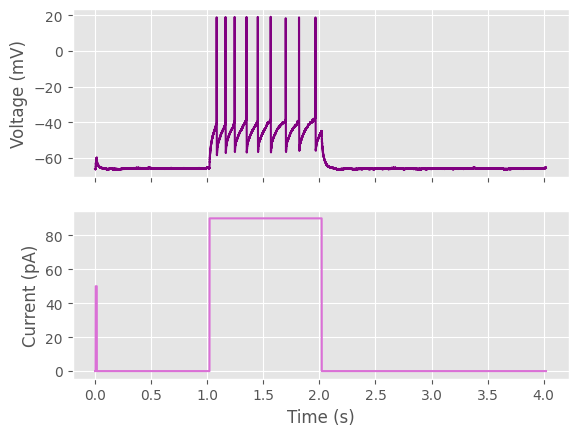

In [11]:
NeuronPlot(29)

**Figure 5.** The real neuron's response to a 1 second step pulse of 90 pA.

The real and simulated neurons had very similar voltage responses to this step pulse. The LIF neuron fired an AP every 114 ms, for a total of 8 spikes during the 1 second period. The real neuron did not produce spikes at a constant rate, but did initiate 9 spikes during the 1 second period. The real neuron's response is less regular than the LIF neuron, which makes sense since neurons in vivo are subject to noise and variability not accounted for in the generalized LIF model. Regardless, the LIF model effectively predicted the real neuron's spiking pattern. 

### ***1 Second Step Pulse of 130 pA***
The next step pulse is of the same duration but increased intensity, 130 pA. The voltage responses of the LIF neuron and real neuron to this waveform are shown in Figures 6 and 7, respectively. 

17

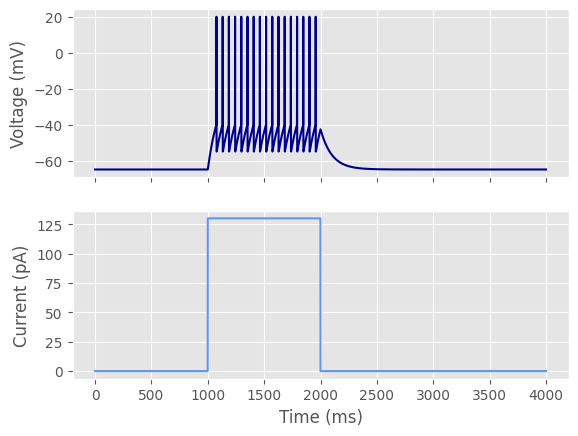

In [12]:
dt = 1 # time between samples (ms)
time = np.arange(0, 4000+dt, dt) # sampling for 4 s every 1 ms
numSamples = time.shape[0] # calculate the number of samples 
I = np.zeros(numSamples) # array to store current time series 
I[1000:2000] = 130 # inject 130 pA for 1 second at 1 second 

V, spikeTimes = LIF(I, dt, EL = -65, VThresh = -40, VRefract = -55, maxDepol = 20, gL = 2.79, tau = 100) 
LIFPlot(time, I, V)
len(spikeTimes)

**Figure 6.** The LIF neuron's response to a 1 second step pulse of 130 pA.

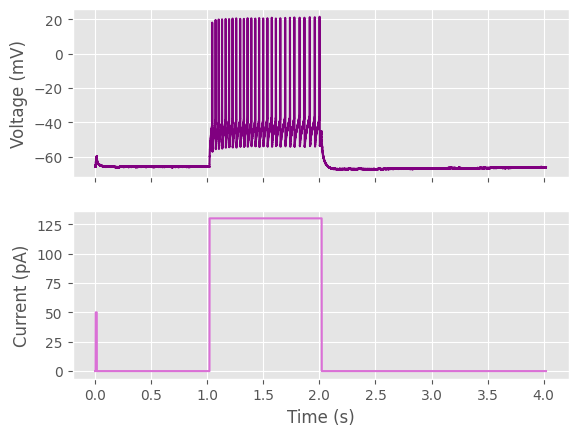

In [13]:
NeuronPlot(31)

**Figure 7.** The real neuron's response to a 1 second step pulse of 130 pA.

The increased intensity of the current injection caused the LIF neuron to fire more frequently. An AP was initiated every 55 ms, for a total of 17 spikes during the 1 second period. Increasing the current strength by 40 pA caused the LIF neuron to spike more than twice as fast. A similar result was therefore expected for the real neuron. The real neuron produced 27 spikes in reponse to this waveform. Again, the firing rate was not constant, with spikes firing more frequently at the beginning of the pulse than at the end. The LIF model was less accurate in predicting the real neuron's exact spiking pattern, but it did suggest that the firing rate would increase as the current intensity increased, which was observed in the real neuron. 

### ***2 Second Step Pulse of 110 pA***
The last depolarizing step pulse tested is of increased duration, 2 seconds, and amplitude 110 pA. The voltage responses of the LIF neuron and real neuron to this waveform are shown in Figures 8 and 9, respectively. 

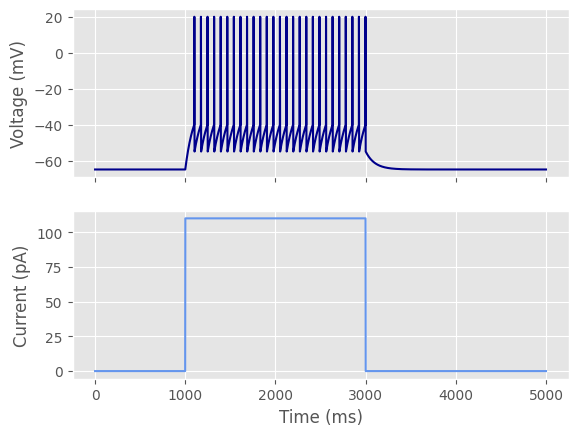

In [14]:
dt = 1 # time between samples (ms)
time = np.arange(0, 5000+dt, dt) # sampling for 5 s every 1 ms
numSamples = time.shape[0] # calculate the number of samples 
I = np.zeros(numSamples) # array to store current time series 
I[1000:3000] = 110 # inject 110 pA for 2 seconds at 1 second 

V, spikeTimes = LIF(I, dt, EL = -65, VThresh = -40, VRefract = -55, maxDepol = 20, gL = 2.79, tau = 100) 
LIFPlot(time, I, V)

**Figure 8.** The LIF neuron's response to a 2 second step pulse of 110 pA. 

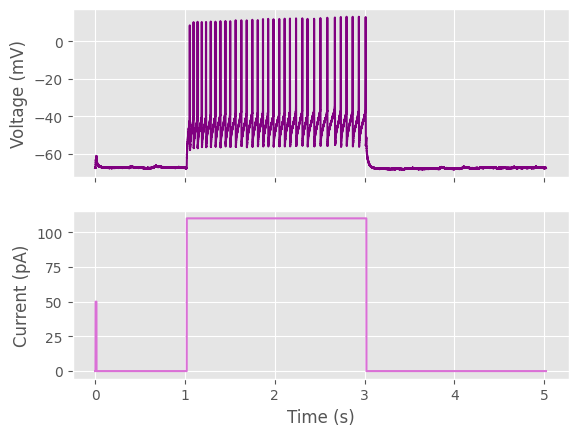

In [15]:
NeuronPlot(50)

**Figure 9.** The real neuron's response to a 2 second step pulse of 110 pA. 

In both neurons, the increased duration of the step pulse caused spikes to be initiated at roughly the same rate throughout the injection period. The LIF neuron fired an AP every 73 ms, for a total of 27 spikes during the 2 second period. The real neuron fired 33 spikes during the 2 second period at varying rates. Again, the LIF neuron spikes more regularly, while the real neuron fires more rapidly at the beginning of the pulse period. This variation is likely due to contextual factors the real neuron experiences which are not accounted for in the LIF model. Despite these differences, the LIF model accurately predicted how the spiking patterns would change for various step pulse amplitudes and durations. 

## ***Hyperpolarizing Step Pulse***
The next waveform reconstructed is a hyperpolarizing 1 second step pulse of -70 pA. This injection will assess the LIF model's ability to predict a real neuron's response to an inhibitory signal. The voltage responses of the LIF and real neurons to this waveform are shown in Figures 10 and 11, respectively.

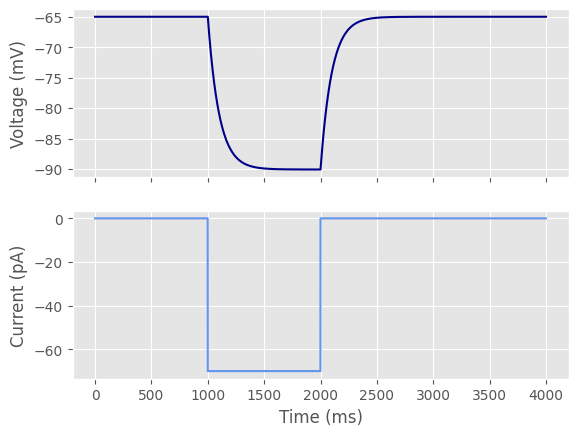

In [16]:
dt = 1 # time between samples (ms)
time = np.arange(0, 4000+dt, dt) # sampling for 4 s every 1 ms
numSamples = time.shape[0] # calculate the number of samples 
I = np.zeros(numSamples) # array to store current time series 
I[1000:2000] = -70 # inject -70 pA for 1 second at 1 second 

V, spikeTimes = LIF(I, dt, EL = -65, VThresh = -40, VRefract = -55, maxDepol = 20, gL = 2.79, tau = 100) 
LIFPlot(time, I, V)

**Figure 10.** The LIF neuron's response to a 1 second step pulse of -70 pA. 

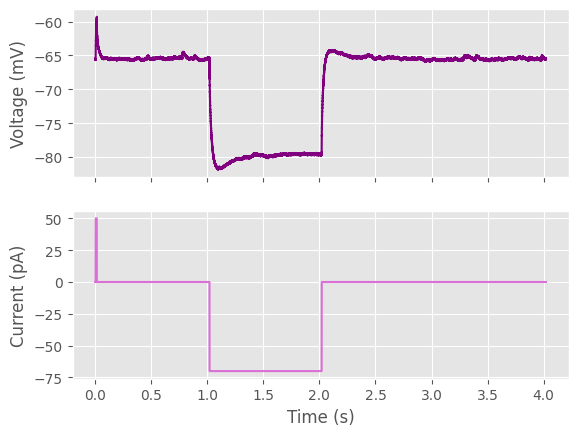

In [17]:
NeuronPlot(21)

**Figure 11.** The real neuron's response to a 1 second step pulse of -70 pA. 

The LIF model accurately predicted the course of the hyperpolarization experienced by the real neuron. Both voltage responses show a rapid hyperpolization at the beginning of the pulse, followed by a hold in voltage, and finially a rapid repolization at the end of the pulse. The real neuron's response is noisier than the LIF neuron's, but the overall shape and course of voltage change is similar. 

## ***Alternating Depolarizing and Hyperpolarizing Delta Functions***

We've seen how the LIF model can predict a real neuron's response to both depolarizing and hyperpolarizing step pulses. The next waveform will see how the LIF model predicts a neuron's response to alternating transient pulses. The LIF and real neurons' responses are shown in Figures 12 and 13, respectively. 

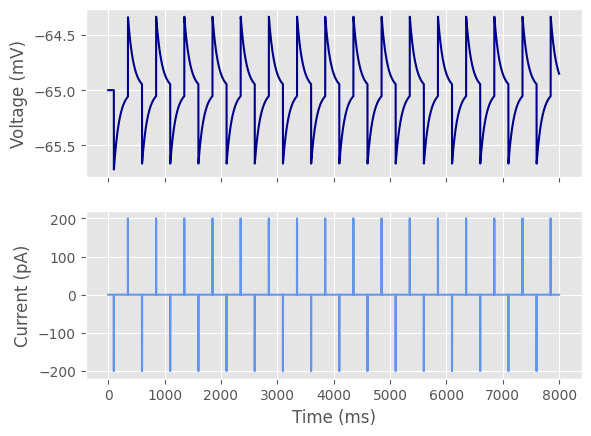

In [18]:
dt = 1 # time between samples (ms)
time = np.arange(0, 8000+dt, dt) # sampling for 8 s every 1 ms
numSamples = time.shape[0] # calculate the number of samples 
I = np.zeros(numSamples) # array to store current time series 
I[100::500] = -200 # inject -200 pA every 500 ms starting at 100 ms
I[350::500] = 200 # inject 200 pA every 500 ms starting at 350 ms 

V, spikeTimes = LIF(I, dt, EL = -65, VThresh = -40, VRefract = -55, maxDepol = 20, gL = 2.79, tau = 100) 
LIFPlot(time, I, V)

**Figure 12.** The LIF neuron's response to alternating hyperpolizaring and depolarizing delta functions of 200 pA.

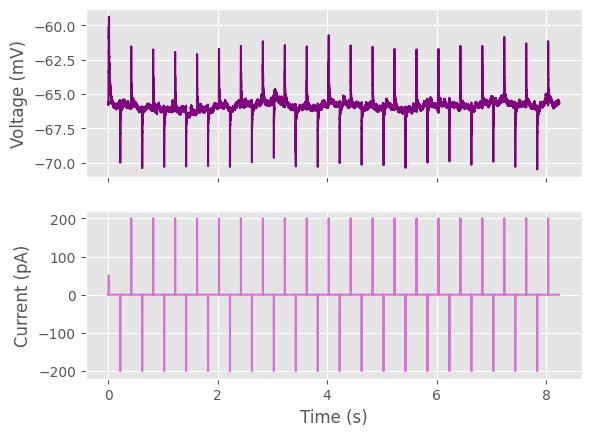

In [19]:
NeuronPlot(43)

**Figure 12.** The real neuron's response to alternating hyperpolizaring and depolarizing delta functions of 200 pA.

The real neuron's voltage response to this injection follows the current waveform much more closely than the LIF neuron. The LIF neuron's response shows a gradual repolarization after the pulse subsides, while the real neuron repolarized almost instantly. Despite this difference, the LIF model did accurately predict that the real neuron would undergo a small voltage change at the instant of the current injection in the direction which coincides with the signal. In this case, the pattern of voltage changes is more precisely predicted by the simulation than the course of those voltage changes. 

## ***Current Ramp***

The next waveform tested is a current ramp, a linear injection which increases in amplitude over time. This injection will evaluate the LIF model's ability to represent neural encoding. Neural encoding is the process in which neurons represent information about their inputs in their generated spiking activity. Specifically, neurons encode the strength of their inputs in their generated spiking rate. The larger the current intensity, the more spikes produced per second. The LIF and real neurons' responses to a current ramp are shown in Figures 13 and 14, respectively. 

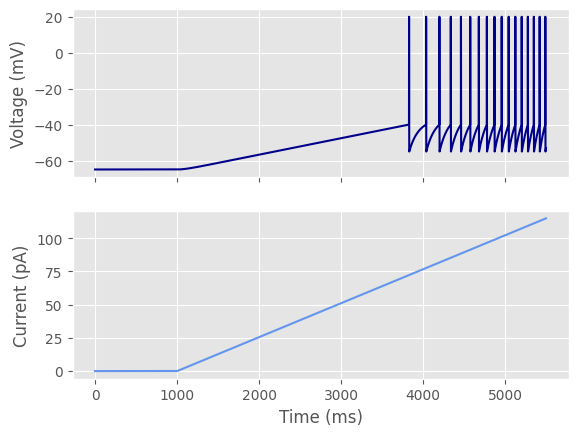

In [20]:
dt = 1 # time between samples (ms)
time = np.arange(0, 5500+dt, dt) # sampling for 5.5 s every 1 ms
numSamples = time.shape[0] # calculate the number of samples 
I = np.zeros(numSamples) # array to store current time series 
I[1001:] = np.linspace(0, 115, 4500) # linear ramp from 0 to 115 pA 

V, spikeTimes = LIF(I, dt, EL = -65, VThresh = -40, VRefract = -55, maxDepol = 20, gL = 2.79, tau = 100) 
LIFPlot(time, I, V)

**Figure 13.** The LIF neuron's response to a current ramp starting at 0 pA and increasing to 115 pA over 4.5 seconds. 

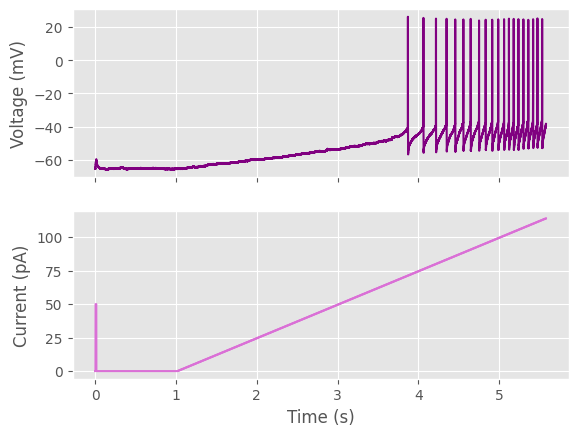

In [21]:
NeuronPlot(6)

**Figure 14.** The real neuron's response to a current ramp starting at 0 pA and increasing to 115 pA over 4.5 seconds. 

The real neuron's voltage response to this current ramp was very well predicted by the LIF simulation. Both neurons produced their first spike around 3.8 seconds when the current intensity reached around 70 pA. After that point, the current continued to increase in amplitude and so did the spiking rate. The main difference between these voltage responses is that the real neuron's spiking frequency increased more rapidly at the end of the current ramp than did the LIF neuron. However, the simulation well represented the relationship between the current intensity and spiking rate, so the LIF model does encompass the neural encoding process.  

## ***Noisy Step Pulses***

The current injections thus far have been perfectly noiseless. In vivo, neurons would not experience such simple signals. Natural neural inputs are noisy, so the generated voltage changes are more variable. A more natural signal can be simulated in the LIF model by adding Gaussian noise to the injection series. This process is perfomed here to compare the predicted and actual neuron respones to a more realistic input. 

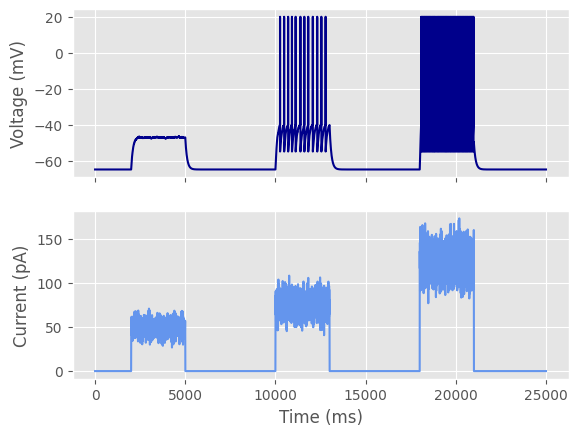

In [22]:
dt = 2 # time between samples (ms)
time = np.arange(0, 25000+dt, dt) # sampling for 25 s every 2 ms
numSamples = time.shape[0] # calculate the number of samples 
I = np.zeros(numSamples) # array to store current time series 
pulse1 = 50 + 7 * np.random.randn(1500) # 50 pA + Gaussian noise with SD = 7
pulse2 = 75 + 10 * np.random.randn(1500) # 75 pA + Gaussian noise with SD = 10
pulse3 = 125 + 15 * np.random.randn(1500) # 125 pA + Gaussian noise with SD = 15
I[1000:2500] = pulse1 
I[5000:6500] = pulse2
I[9000:10500] = pulse3

V, spikeTimes = LIF(I, dt, EL = -65, VThresh = -40, VRefract = -55, maxDepol = 20, gL = 2.79, tau = 100) 
LIFPlot(time, I, V)

**Figure 15.** The LIF neuron's response to three consecutive 3-second noisy step pulses. The step pulse injected at 2 seconds is 50 pA with Gaussian noise with SD of 7 pA. The step pulse injected at 10 seconds is 75 pA with Gaussian noise with SD of 10 pA. The step pulse at 18 seconds is 125 pA with Gaussian noise with SD 15 pA. 

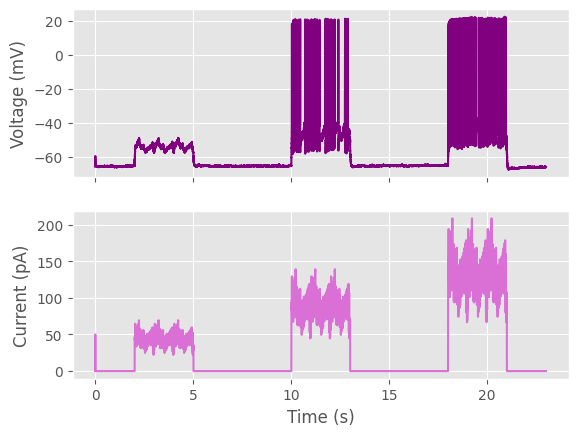

In [23]:
NeuronPlot(37)

**Figure 16.** The real neuron's response to three consecutive 3-second noisy step pulses. The pulses were injected at times 2 seconds, 10 seconds, and 18 seconds. The strengths of these pulses respectively were 50 pA, 75 pA, and 125 pA, all with some noise component. 

As expected, adding noise to the step pulses added variability to the model's predicted voltage response. For the second two pulses, which were sufficient to trigger APs, spikes were not generated at a constant rate, which is more likely to be seen in real neurons. The model also accurately predicted that the first step pulse of around 50 pA would be too weak to trigger any spikes. It was seen in earlier injections that the real neuron produced noisy responses to noiseless input signals. This is due to the fact that neurons in vivo are part of complex networks. There are many internal and synaptic factors which influence the dynamics of their voltage responses. Simulated neurons do not experience this variability, so noise must be simulated in the LIF model by adding noise to the input signal. 

---
## **Discussion**

The Leaky Integrate-and-Fire (LIF) model is a mathematical simulation of the electrical activity observed in neurons. It specficically describes how the membrane potential changes in response to electrical signals. The basic idea behind this model is that inputs integrate linearly in the membrane while some currents leak out. If inputs cumulate enough for the membrane to reach a threshold voltage, a nonlinear spike occurs. The potential then resets to the leak reversal potential. There are many parameters of the LIF model which dictate its performance, including the voltage threshold, resting potential, membrane time constant, and refractory time constant. All of these values can be adjusted to optimize the models simulation of different neurons and their behaviors. 

This project aimed to evaluate a simple LIF model by comparing its outputs to real neuron data. After optimizing the parameters for our specific neuron, a variety of stimuli were injected and their responses compared. The first injections were step pulses of various amplitudes and durations. The model failed to exactly predict the spike counts, but it well predicted how spiking patterns depended on the stimulus. Higher intensity pulses produced larger firing rates, and longer step pulses produced longer spiking durations, so while the exact numerical values were not well predicted, the relationship between stimulus properties and response patterns was well represented. In response to a hyperpolarizing step pulse, the model also well predicted the course of the membrane hyperpolarization. The exact hyperpolarized potential value was not correct, but the shape of the voltage response was reflected in the model. A similar result was seen in response to alternating current Delta functions. The real neuron repolarized much quicker than the model neuron, so the shapes of the voltage changes are different, but the pattern of potential change was the same. Both neurons alternated between depolarizing and hyperpolarizing as the current type alternated. The next current injection was a linear ramp. Current ramps are useful for capturing the process of neural encoding, as a stronger signal should produce a larger firing rate. The real and LIF neurons' responses to a current ramp were very similar. The first spikes in each neuron were initiated at about the same time and current intensity, then spiking rates increased through the end of the injections. The LIF model therefore captures the process of neural encoding, and would be useful for understanding this phenomenon in biological neurons. The last injection was a series of step pulses with Gaussian noise. The motivation behind adding noise to the input signal was that real neuron responses are noisy due to contextual factors not represented in the LIF simulation. Biological neuron responses are therefore variable while the LIF neuron's response is highly regulated. Adding noise to the input current therefore introduced some of the response variability observed in actual neurons, so these responses are more biologically viable. Overall, the LIF model was found to be powerful for predicting patterns of neural behavior. While there were some inaccuracies in the exact spike counts and potential values, the general characteristics of responses was well captured. The LIF model is therefore useful for studying the relationship between stimulus features and response properties, but less so for predicting the exact details of those dynamics. 

The LIF model is a highly simplified simulation of a highly complex system, which yields both limitations and benefits of its use. For one, simplifying an intricate system does reduce its capacity for representing known biophysical complexities. The only nonconstant factor of the LIF model is the membrane voltage, which depends solely on the input signal. In reality, there are many dynamic processes which influence the electrical responses of neurons. For example, channel conductance is highly dependent on the internal state of the cell, the state and quantity of ionic channels, and the occurance of previous spikes. None of these factors are considered in the LIF model since conductance is fixed. Also, processes like potentiation and adaptation are not captured in the model since simulated spikes are independent of each other. On the other hand, its simplicity does allow this model to be efficient and easily interpretable. Its parameterization also increases the versatility of this model for representing different neurons and features. There are other models of single neurons, like the Hodgkin-Huxley model, which better encompass neural dynamics at the cost of interpretability. Depending on the research purpose, a more or less simplified model might be most beneficial, but the LIF model is certainty adequate for studying neural response patterns. 

---
## **Sources**

Braun, Jochen. Leaky-Integrate-and-Fire Model, Otto-von-Guericke-Universit¨at Magdeburg, Cognitive Biology Group. 

Gerstner, Wulfram. “Neurons and Mathematics.” Neuronal Dynamics, Cambridge University Press, 8 Sept. 2014. 

Goldschen-Ohm, Marcel. “LIF-Neuron.” GitHub, Mar. 2024. 

Gu, Qinglong. “The Leaky Integrate-and-Fire (LIF) Neuron Model.” Neuromatch Academy: Computational Neuroscience, Neuromatch. 

“Cell Types: Overview of the Data.” Allen Brain Atlas, Allen Institute for Brain Science. 